Entries of Events:	 437
Entries of Events:	 451
Bins:	 [-20 -17 -14 -11  -8  -5  -2   1   4   7  10  13  16  19  22  28  34  40
  46  52  58  64  72  80  90 102 116 132 150 170 192 216 242 270 300 332
 366 402 440 480 522 566 612 660 710 762 816]
Processing i_entry = 0
Processing i_entry = 200
Processing i_entry = 400
Bins:	 [-20 -17 -14 -11  -8  -5  -2   1   4   7  10  13  16  19  22  28  34  40
  46  52  58  64  72  80  90 102 116 132 150 170 192 216 242 270 300 332
 366 402 440 480 522 566 612 660 710 762 816]
Processing i_entry = 0
Processing i_entry = 200
Processing i_entry = 400


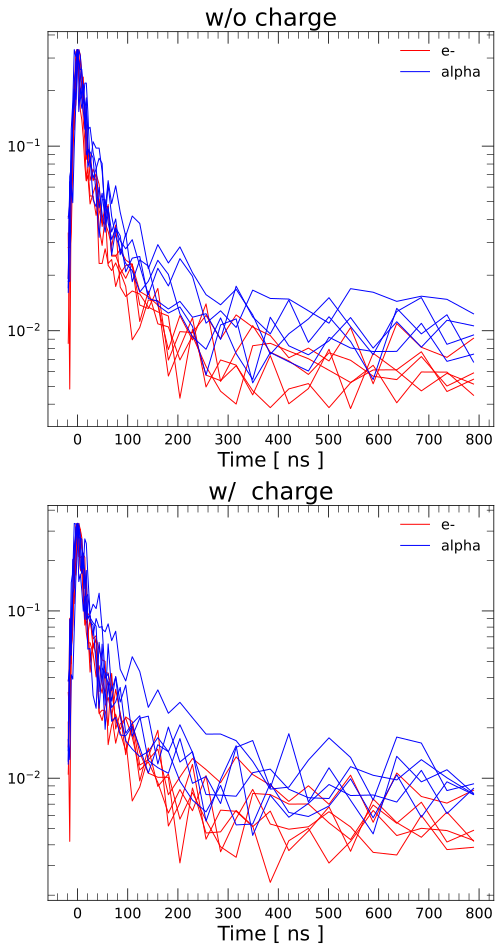

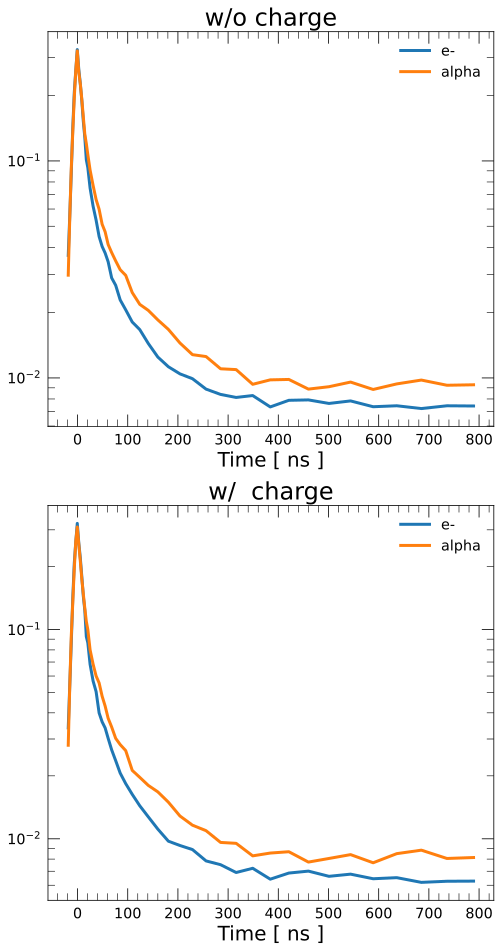

In [19]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/PSD_LoweE/Preprocess/")

# from importlib import reload
# import PSD_dataset
# reload(PSD_dataset)
from PSD_dataset import PSDDataset

fig1, axes_separate = plt.subplots(2, 1, figsize=(8,16))
fig2, axes_mean = plt.subplots( 2,1, figsize=(8,16))
v_color = ["red", "blue"]
psd_data_alpha = PSDDataset("root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/PSD_LowE/alpha/RawData/detsimNB_701.root",
                            "alpha")
psd_data_e = PSDDataset("root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/PSD_LowE/e-/RawData/detsimNB_1.root",
                            "e-")
dir_dataset = {"e-":psd_data_e, "alpha":psd_data_alpha}

# bins_hist = list(range(-20,20,3)) + list(range(20, 63,6)) + [ 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
#                  402, 440, 480, 522, 566, 612, 660, 710, 762, 816]
def GetIncreaseStep(x0, x1, step, step_increase):
    x_return = [x0]
    for i in range(int(x1-x0)):
        if x_return[-1] <= x1:
            x_return.append(x_return[-1]+step+i*step_increase)
    return x_return

bins_hist = list(range(-20,20,3)) + list(range(22, 66,6))  + [ 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
                                                                  402, 440, 480, 522, 566, 612, 660, 710, 762, 816]
# bins_hist = list(range(-20,20,3)) + list(range(22, 66,6))  + GetIncreaseStep(72,816,13,2)
# bins_hist = list(range(-19,20,4)) + list(range(20, 62,8)) + [62+i*10 for i in range()]
log = False
for i,key in enumerate(dir_dataset.keys()):
    dir_dataset[key].SetBins(bins_hist)
    dir_dataset[key].LoadData(equen_uplimit=0.6, equen_downlimit=0.3)
    dir_dataset[key].DrawTimeProfile(axes=axes_separate, plot_mean=False, color=v_color[i],
                                     label=key,log=True,n_lines_to_plot=5)
    dir_dataset[key].DrawTimeProfile(axes=axes_mean, plot_mean=True, color=v_color[i],
                                     label=key,log=True)
path_save_fig = "/afs/ihep.ac.cn/users/l/luoxj/PSD_LoweE/figure/"
fig1.savefig(path_save_fig+"separate_time_profile.png")
fig2.savefig(path_save_fig+"mean_time_profile.png")
